In [201]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import csv

# Importing and reading CSV file
file_input = 'C:\\Users\\Sneha Rani\\CapstoneProject-LR\\ibm-hr-attrition.csv'
df1 = pd.read_csv(file_input, index_col=None)
df1.head()

Populating the interactive namespace from numpy and matplotlib


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [202]:
# Pre cleaned the dataset by removing some of the insignificant columns
df2 = df1[['Age','Attrition','BusinessTravel','Department','DistanceFromHome','Education','EducationField',
           'EnvironmentSatisfaction','Gender','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome',
           'NumCompaniesWorked','OverTime','PercentSalaryHike','RelationshipSatisfaction','TotalWorkingYears',
           'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
df2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobRole,...,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,Sales Executive,...,8,Yes,11,1,8,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,...,1,No,23,4,10,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,Laboratory Technician,...,6,Yes,15,2,7,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,...,1,Yes,11,3,8,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,Laboratory Technician,...,9,No,12,4,6,3,2,2,2,2


### Is Age statistically impacting the Attrition Rate?

*As I stated earlier while finding age-group having maximum contribution, I analyzed from the graph that count of Mid_age_adults are more and they are the highest contributor for Attrition and Old_adults group of people have least attrition rate.
So in order to check whether 'Age' is one of the factor which is affecting attrition, we further dived by using statistical inferential technique by finding relationship between two variables 'Age' and 'Attrition'.*

*Since Attrition and Age Group were both categorical variables, I decided to use **Chi Square contingency test** to find the dependency between these two variables using chi2_contingency() function.*

*Age grouping done earlier show list table with Attrition Rate count. This table can't be used in Chi Square contingency test as it expects a data frame as an input. So we organized the 'Age' feature into categorical data format  by using cut() function on data frame and introduced new column named 'Age_group_name'.*

In [203]:
g1 = df1[(df2.Age >=15) & (df2.Age <=24)].groupby('Attrition').agg({'Age': ['count']})
d1 = g1.rename(columns={"Age": "Young_adults"})
g2 = df1[(df2.Age >=25) & (df2.Age <=40)].groupby('Attrition').agg({'Age': ['count']})
d2 = g2.rename(columns={"Age": "Mid_age_adults"})
g3 = df1[(df2.Age >=41) & (df2.Age <=54)].groupby('Attrition').agg({'Age': ['count']})
d3 = g3.rename(columns={"Age": "Mid_to_old_adults"})
g4 = df1[(df2.Age >=55) & (df2.Age <=64)].groupby('Attrition').agg({'Age': ['count']})
d4 = g4.rename(columns={"Age": "Old_adults"})
frames = [d1, d2, d3, d4]
res = pd.concat(frames, axis=1)
print(res)

          Young_adults Mid_age_adults Mid_to_old_adults Old_adults
                 count          count             count      count
Attrition                                                         
No                  59            761               355         58
Yes                 38            147                41         11


In [204]:
age_bins = [15,25,40,55,65] # age cut-off 
age_labels= ['Young_adults', 'Mid_age_adults', 'Mid_to_old_adults', 'Old_adults'] # label for above range
df2['Age_group'] = pd.cut(df2['Age'],age_bins,labels=age_labels,right=True,include_lowest=True)
df2.head()

F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobRole,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_group
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,Sales Executive,...,Yes,11,1,8,1,6,4,0,5,Mid_to_old_adults
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,Research Scientist,...,No,23,4,10,3,10,7,1,7,Mid_to_old_adults
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,Laboratory Technician,...,Yes,15,2,7,3,0,0,0,0,Mid_age_adults
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,Research Scientist,...,Yes,11,3,8,3,8,7,3,0,Mid_age_adults
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,Laboratory Technician,...,No,12,4,6,3,2,2,2,2,Mid_age_adults


**Null hypothesis (H0):** *The 2 categorical variables are independent (there is no relationship between the variables)*

**Alternate hypothesis (H1):** *The 2 categorical variables are dependent (there is a relationship between the variables)*

In [205]:
# Chi_Contingency test for deciding independence between two variables Attrition and Age_group
import ipy_table as tbl
table = pd.crosstab([df2['Attrition']], df2['Age_group'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item', 'Value'],
    ['Chi-Square Test', chi2],
    ['P-Value', p],
]
tbl.make_table(results)

Item,Value
Chi-Square Test,44.8397
P-Value,0.0000


*So based on the above results, we conclude that 'Age_Group' and 'Attrition are not at all independent of each other and are correlated.Thus, we can reject null hypothesis*

### Do male or female of different age groups impact differently to the employee attrition? 

In [214]:
# Table of Gender with different age groups with attrition 
attrition_relation = pd.crosstab(index=df2["Attrition"], 
                             columns=[df2["Age_group"],df2["Gender"]
                                      ],
                             margins=True)   # Include row and column totals

attrition_relation

Age_group Young_adults      Mid_age_adults      Mid_to_old_adults       \
Gender          Female Male         Female Male            Female Male   
Attrition                                                                
No                  25   54            301  440               157  217   
Yes                 18   26             51   90                15   29   
All                 43   80            352  530               172  246   

Age_group Old_adults        All  
Gender        Female Male        
Attrition                        
No                18   21  1233  
Yes                3    5   237  
All               21   26  1470

In [215]:
# Table of Gender with different age groups with attrition shown in percentage
attrition_relation/attrition_relation.loc["All"]*100

Age_group Young_adults        Mid_age_adults             Mid_to_old_adults  \
Gender          Female   Male         Female        Male            Female   
Attrition                                                                    
No           58.139535   67.5      85.511364   83.018868          91.27907   
Yes          41.860465   32.5      14.488636   16.981132           8.72093   
All         100.000000  100.0     100.000000  100.000000         100.00000   

Age_group              Old_adults                     All  
Gender           Male      Female        Male              
Attrition                                                  
No          88.211382   85.714286   80.769231   83.877551  
Yes         11.788618   14.285714   19.230769   16.122449  
All        100.000000  100.000000  100.000000  100.000000

*Here we see something quite interesting:*

*As seen from above table, Male and Female in Young_adults age group leaving the company is having higher percentage even though they are less in number compared to Male and Female of Mid_age_adults. So it would likely be useful to include Age_group
as a feature in predictive model.*

In [208]:
# Table of Attrition vs. Gender
attrition_gender = pd.crosstab(index=df2["Attrition"], 
                           columns=df2["Gender"],
                              margins=True)
attrition_gender

Gender,Female,Male,All
Attrition,,,
No,501,732,1233
Yes,87,150,237
All,588,882,1470


In [209]:
# Table of Attrition vs. Gender shown in percentage
attrition_gender/attrition_gender.loc['All']*100

Gender,Female,Male,All
Attrition,,,
No,85.204082,82.993197,83.877551
Yes,14.795918,17.006803,16.122449
All,100.000000,100.000000,100.000000


In [210]:
#Chi_Contingency test for deciding independence between two variables Attrition and Gender
import ipy_table as tbl
table = pd.crosstab([df2['Attrition']], df2['Gender'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
result = [
    ['Item', 'Value'],
    ['Chi-Square Test', chi2],
    ['P-Value', p],
]
tbl.make_table(result)

Item,Value
Chi-Square Test,1.1170
P-Value,0.2906


*Even though Male and Female contribute to the attrition rate as shown above from Chi-Square Test of Independence, result shows high p-value(0.2906) which approves the null hypothesis that there is no significant relationship between the variables 'Gender' and 'Attrition'. As if now, I think it may be not useful to include as a feature in a predictive model.*

### At last I am wrapping up by plotting each variable and seeing it's influence on the Attrition of the organization.

1)**JobRole:**Employees leaving company has higher impact on job role as majority are more from Laboratory Technician, Research  Scientist and Sales Executive.

2)**BusinessTravel:**Employees leaving organization has been seen travelling more.

3)**Department:**Employees leaving HR department are less in number and proportion of total number of HR employees are also      less in ratio as compared to other departments.

4)**DistanceFromHome:**Employees leaving the company are almost uniformly distributed either travelling from near by place or    far.

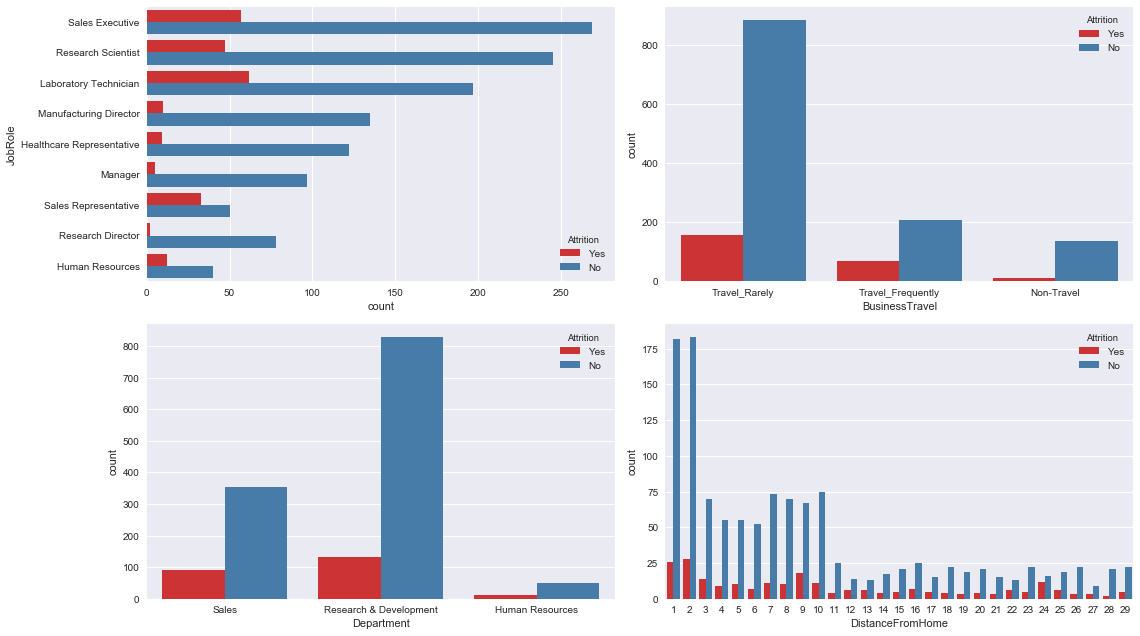

In [211]:
sns.set()
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,9))
sns.countplot(y='JobRole', hue='Attrition', data=df2, ax=ax1, palette='Set1')
sns.countplot(x='BusinessTravel', hue='Attrition', data=df2, ax=ax2, palette='Set1')
sns.countplot(x='Department', hue='Attrition', data=df2, ax=ax3, palette='Set1')
sns.countplot(x='DistanceFromHome', hue='Attrition', data=df2, ax=ax4, palette='Set1')
sns.set_style('dark')
plt.tight_layout()

5)**Education:**Empoyees leaving organization doesn't show higher impact on education as it is somewhat same for all levels(below college , college, bachelor, master) except doctor which shows lower percentage of attrition.

6)**EducationField:**There are people employeed from various education field in which HR and other field shows huge downfall with respect to attrition rate.

7)**EnvironmentSatisfaction:**All the categories(low, medium, high, very high) under this feature contribute similar to the attrition rate and seems like all are equally distributed.

8)**Gender:**Males employees leaving the organization has higher percentage of attrition as compared to female employees.Even though when I consider it as a whole, does not have much impact.

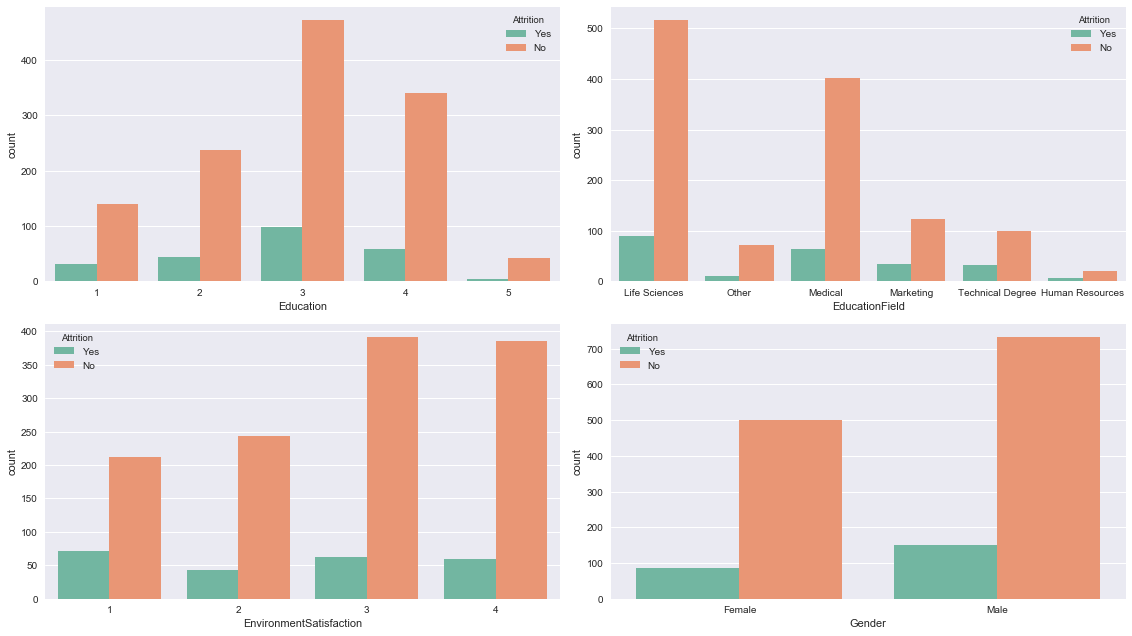

In [216]:
sns.set()
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,9))
sns.countplot(x='Education', hue='Attrition', data=df2, ax=ax1, palette='Set2')
sns.countplot(x='EducationField', hue='Attrition', data=df2, ax=ax2, palette='Set2')
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df2, ax=ax3, palette='Set2')
sns.countplot(x='Gender', hue='Attrition', data=df2, ax=ax4, palette='Set2')
plt.tight_layout()

9)**OverTime:**Percentage of employees working overtime leave company more.

10)**JobSatisfaction:**As per metadata 1 ‘Low’ 2 ‘Medium’ 3 ‘High’ 4 ‘Very High’. We see higher attrition levels in among lower Job Satisfaction levels.

11)**MaritalStatus:**Employees who are 'Single' are more prone to attrition than people who are married or divorced which is another interesting fact.

12)**NumCompaniesWorked:**We see that employees  working in One organization quit a lot.

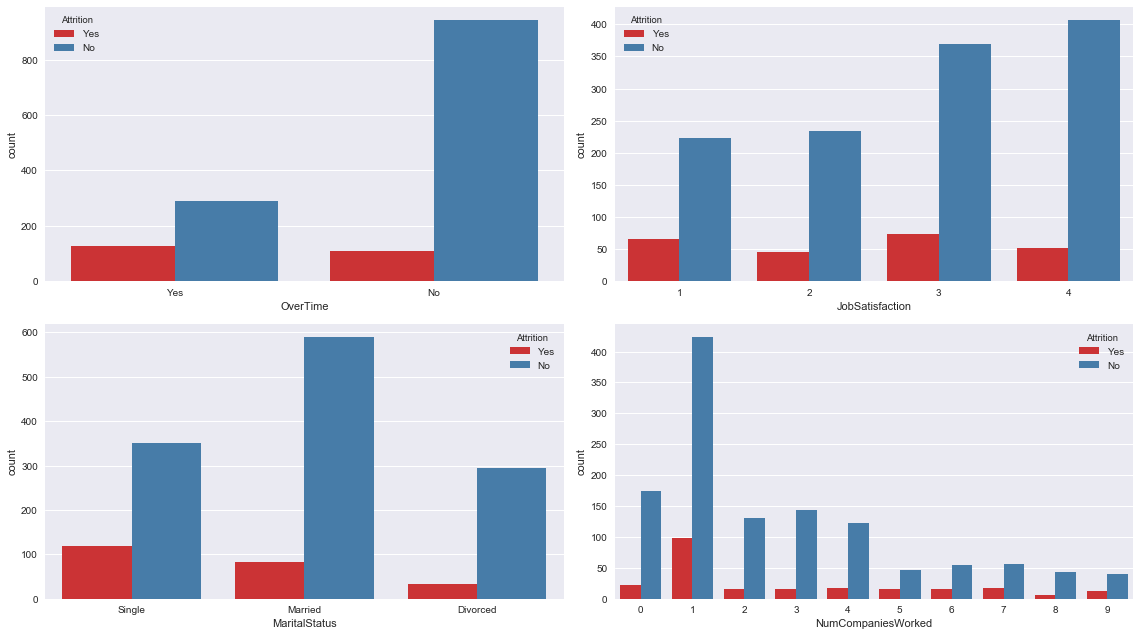

In [196]:
sns.set()
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,9))
sns.countplot(x='OverTime', hue='Attrition', data=df2, ax=ax1, palette='Set1')
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df2, ax=ax2, palette='Set1')
sns.countplot(x='MaritalStatus', hue='Attrition', data=df2, ax=ax3, palette='Set1')
sns.countplot(x='NumCompaniesWorked', hue='Attrition', data=df2, ax=ax4, palette='Set1')
plt.tight_layout()

13)**PercentSalaryHike:** Employees receiving different level of percent salary hike contribute to attrition rate. We also see that employees leaving organization are more in numbers having less than 15% hike.

14)**RelationshipSatisfaction:** ‘Low’ 2 ‘Medium’ 3 ‘High’ 4 ‘Very High’. Higher number of employees with 3 or more rating have more chances of leaving the company but large proportions of 1 & 2 rating are also leaving the most.

15)**TotalWorkingYears:** Employees having less than one year of experience quit company the most.
 
16)**WorkLifeBalance:**Ratings as per Metadata is 1 ‘Bad’ 2 ‘Good’ 3 ‘Better’ 4 ‘Best’. As expected larger proportion of 1 rating quit, but absolute number wise 2 & 3 are on higher side.

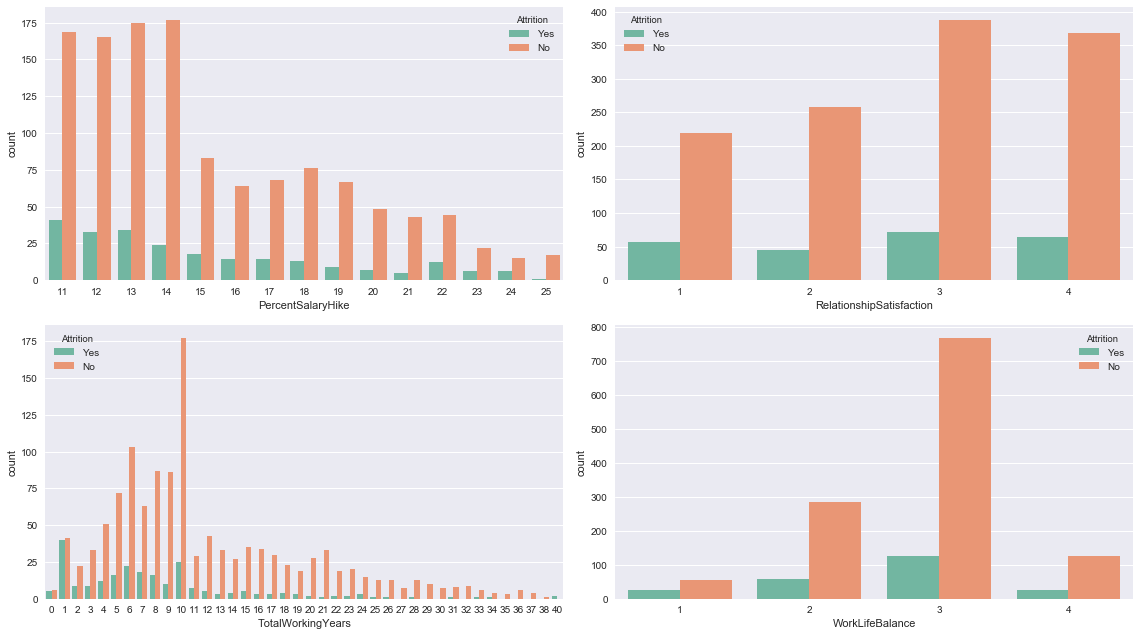

In [217]:
sns.set()
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,9))
sns.countplot(x='PercentSalaryHike', hue='Attrition', data=df2, ax=ax1, palette='Set2')
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df2, ax=ax2, palette='Set2')
sns.countplot(x='TotalWorkingYears', hue='Attrition', data=df2, ax=ax3, palette='Set2')
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df2, ax=ax4, palette='Set2')
plt.tight_layout()

17)**YearsAtCompany:**Employees spending less than 10 years contribute most to the attrition rate and also 
has maximum attrition rate of freshers. 

18)**YearsInCurrentRole:** May be change in job role a major factor for leaving organization as larger proportion with just 0-2 years are quitting most.

19)**YearsSinceLastPromotion:**Maximum number of employees who have been promoted recently are more in numbers, quitting the organization.

20)**YearsWithCurrManager:**I see that new Managers who have recently joined the organization is a big cause for employees leaving the company.

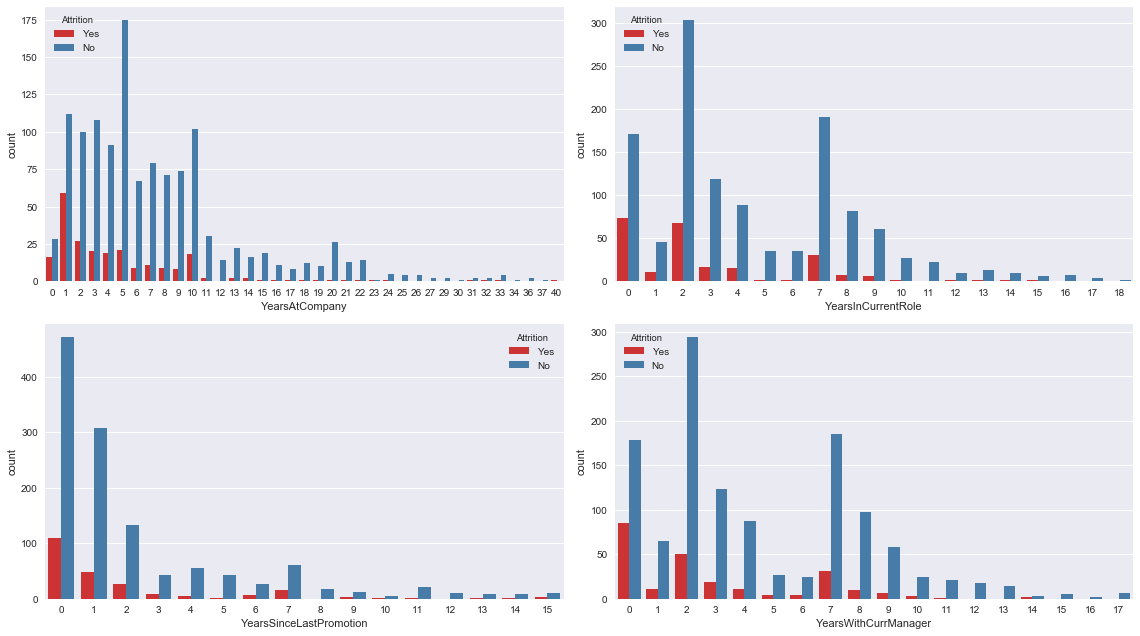

In [218]:
sns.set()
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,9))
sns.countplot(x='YearsAtCompany', hue='Attrition', data=df2, ax=ax1, palette='Set1')
sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=df2, ax=ax2, palette='Set1')
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df2, ax=ax3, palette='Set1')
sns.countplot(x='YearsWithCurrManager', hue='Attrition', data=df2, ax=ax4, palette='Set1')
plt.tight_layout()

21)**MonthlyIncome:**I see higher levels of attrition among the lower segment of monthly income. It might be due to the income disparity with efforts in the work.

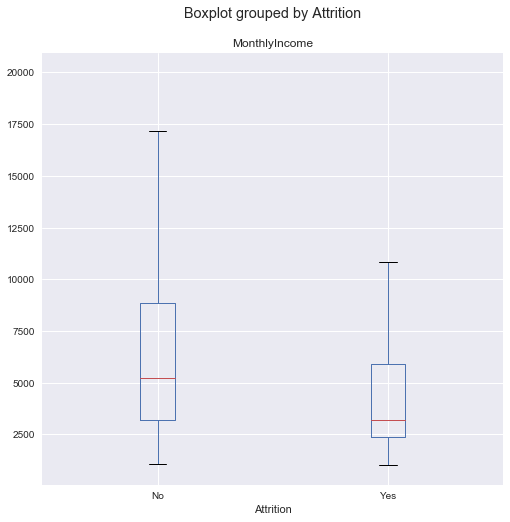

In [199]:
df2.boxplot(column='MonthlyIncome',        # Column to plot
                 by= 'Attrition',         # Column to split upon
                 figsize= (8,8))